<a href="https://colab.research.google.com/github/maing-rv/python_cw/blob/main/python_cw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Loading the data

Collab code environment:
Mai was here.

Problem statement and hypothesis: Predicting popularity vs. Genre classification.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# How to load files: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
from google.colab import files
uploaded = files.upload()

In [ ]:
# Data by year:
spotify_data_by_year = pd.read_csv('data_by_year.csv')
spotify_data_by_year.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1


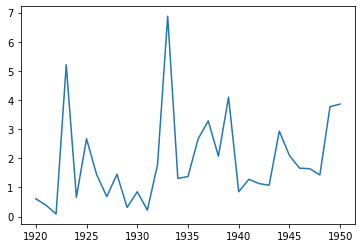

In [60]:
# Popularity by year, 1920 to 1950:
plt.plot(spotify_data_by_year.year[:31], spotify_data_by_year.popularity[:31])
plt.show()

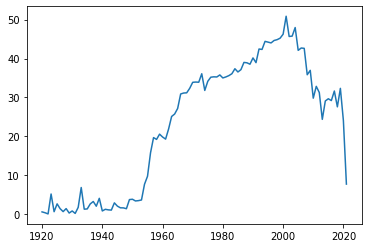

In [61]:
# Popularity by year, 1920 to 2020:
plt.plot(spotify_data_by_year.year, spotify_data_by_year.popularity)
plt.show()

In [ ]:
# Data w/ popularity:
spotify_data = pd.read_csv('data.csv')
print(spotify_data.head())
print(spotify_data.describe())

   acousticness                    artists  ...  valence  year
0      0.991000            ['Mamie Smith']  ...   0.6340  1920
1      0.643000  ["Screamin' Jay Hawkins"]  ...   0.9500  1920
2      0.993000            ['Mamie Smith']  ...   0.6890  1920
3      0.000173        ['Oscar Velazquez']  ...   0.0422  1920
4      0.295000                   ['Mixe']  ...   0.2990  1920

[5 rows x 19 columns]
        acousticness   danceability  ...        valence           year
count  174389.000000  174389.000000  ...  174389.000000  174389.000000
mean        0.499228       0.536758  ...       0.524533    1977.061764
std         0.379936       0.176025  ...       0.264477      26.907950
min         0.000000       0.000000  ...       0.000000    1920.000000
25%         0.087700       0.414000  ...       0.311000    1955.000000
50%         0.517000       0.548000  ...       0.536000    1977.000000
75%         0.895000       0.669000  ...       0.743000    1999.000000
max         0.996000       0.98

In [53]:
spotify_data.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

Column descriptions:  
Acousticness -   
Danceability -  
Duration_ms -  
Energy -   
Explicit -  
Instrumentalness -   
Key - 0-11  
Liveness -  
Loudness -  
Mode - 
Speechiness -   
Tempo -   
Valence -  
Year -   

Columns to drop:  
1) artists,
2) id,
3) release_date,
4) name




In [ ]:
spotify_data_w_genres = pd.read_csv('data_w_genres.csv')
#spotify_data_w_genres.head()

In [68]:
spotify_data_20_50 = spotify_data[spotify_data.year <= 1950]
spotify_data_20_50.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


### Preproccessing Dataset


In [ ]:
spotify_data.isnull().sum()

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
genres              0
dtype: int64

In [54]:
spotify_data.duplicated().sum()

2159

In [63]:
corr = spotify_data.corr()
#corr

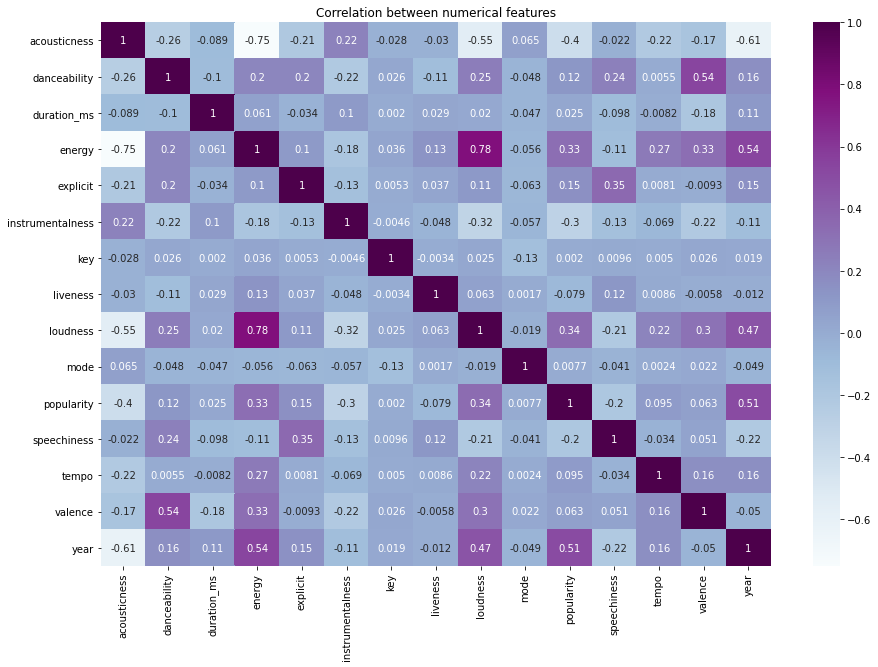

In [62]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap='BuPu') #BrBG_r
plt.title('Correlation between numerical features')
plt.show()

Question: What year range to use? 